# Part A

In [1]:
# Import libraries and establish matplotlib inline
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress

In [2]:
# read csv files from yahoo finance.  parse_dates arguments to make index columns datetime 
dfNVDA = pd.read_csv("NVDA.csv", index_col = "Date", parse_dates = True).sort_values(by = "Date",ascending = False)
dfSP = pd.read_csv("SPY.csv",index_col = "Date",parse_dates = True).sort_values(by = "Date",ascending = False)

In [3]:
# info check on Nvidia
dfNVDA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2023-03-23 to 2018-03-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


# Part B

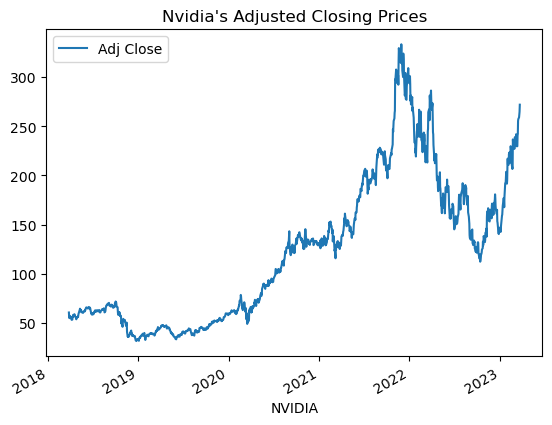

In [18]:
# Line chart of Nvidia's adjusted closing prices
dfNVDA["Adj Close"].plot.line(xlabel = "NVIDIA")
plt.title("Nvidia\'s Adjusted Closing Prices")
plt.legend(loc='upper left')
plt.show()

# Part C

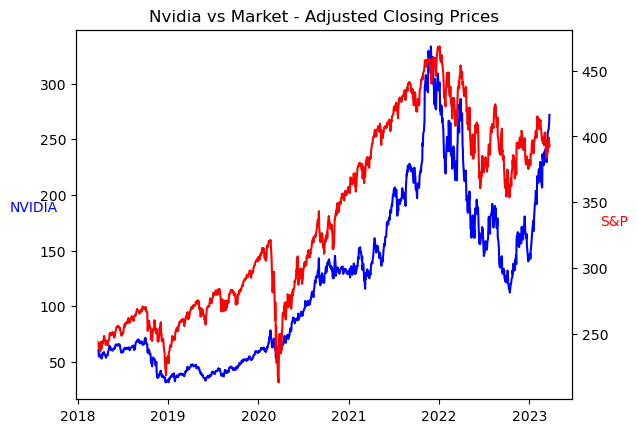

In [20]:
# plot 2 time series
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.title("Nvidia vs Market - Adjusted Closing Prices")

# plot data on the first Y axis
ax1.plot(dfNVDA.index, dfNVDA["Adj Close"], label = "NVDA",color = 'blue')#,linestyle = '--')
ax1.set_ylabel('NVIDIA', color='blue',rotation = 0)

# plot data on the second Y axis
ax2.plot(dfSP.index, dfSP["Adj Close"], label="S&P",color = 'red')
ax2.set_ylabel('S&P', color='red',rotation = 0)

plt.show()

# Part D

## D1

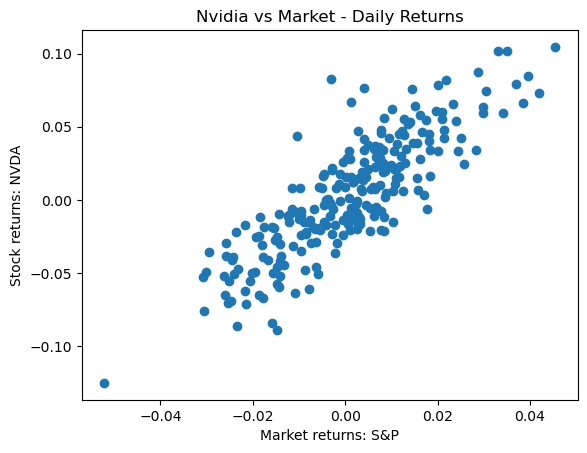

In [6]:
# calculate daily returns for S&P and Nvidia for year 2022
x = dfSP["Adj Close"].loc[(dfSP.index>'2021-12-31') & (dfSP.index<'2023-01-01')] 
xret = x.pct_change()[1:]
xret.rename("Daily Return",inplace = True)

y = dfNVDA["Adj Close"].loc[(dfNVDA.index>'2021-12-31') & (dfNVDA.index<'2023-01-01')]
yret = y.pct_change()[1:]
yret.rename("Daily Return",inplace = True)

# Create scatter plot of daily returns
plt.title("Nvidia vs Market: Daily Returns")
plt.scatter(xret, yret)
plt.xlabel('Market returns: S&P')
plt.ylabel('Stock returns: NVDA')
plt.show()

## D2

In [7]:
# regression of Nvidia's returns vs. Market Index
indvars = sm.add_constant(xret) # allow for non-zero intercept
model = sm.OLS(yret, indvars).fit() #OLS= ordinary least-squares regression
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:           Daily Return   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     613.1
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           5.55e-69
Time:                        14:28:27   Log-Likelihood:                 606.75
No. Observations:                 250   AIC:                            -1210.
Df Residuals:                     248   BIC:                            -1202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0016      0.001      1.187   

In [8]:
# alternative for regression: scipy
beta, alpha, r, p, stderr = linregress(xret, yret)
print("Beta=     ", round(beta, 4))
print("Alpha=    ", round(alpha,4))
print("R-squared=", round(r**2*100,1), '%')
print("P-stat=   ", round(p,6))

Beta=      2.1968
Alpha=     0.0016
R-squared= 71.2 %
P-stat=    0.0


### equation of line: y = 2.2x+.002
### R-squared value: 71.2%
### slope: 2.2

# Part E

In [30]:
#NVIDIA
print("Date of Nvidia\'s largest daily price return:",str(yret.idxmax())[0:10],"\nDate of Nvidia\'s smallest daily price return:",str(yret.idxmin())[0:10]
      ,"\n")
#S&P
print("Date of S&P\'s largest daily price return:",str(xret.idxmax())[0:10],"\nDate of S&P\'s smallest daily price return:",str(xret.idxmin())[0:10])

Date of Nvidia's largest daily price return: 2022-09-12 
Date of Nvidia's smallest daily price return: 2022-11-09 

Date of S&P's largest daily price return: 2022-09-12 
Date of S&P's smallest daily price return: 2022-11-09


In [36]:
# Create dataframe of Nvidia's strongest and weakest daily returns
dfReturnValue = dfNVDA[["Adj Close"]].join(pd.DataFrame(yret),how = "inner").loc[[yret.idxmax(),yret.idxmin()]]
dfReturnValue['Daily Return Value'] = ["Strongest","Weakest"]
dfReturnValue.iloc[:, ::-1]

,Daily Return Value,Daily Return,Adj Close
Date,,,
2022-09-12,Strongest,0.104638,144.988281
2022-11-09,Weakest,-0.125333,137.701370


### RTX 3060 news on September 12, 2022
### FTX collapse attributing to most negative daily return on November 9, 2022

# Part F

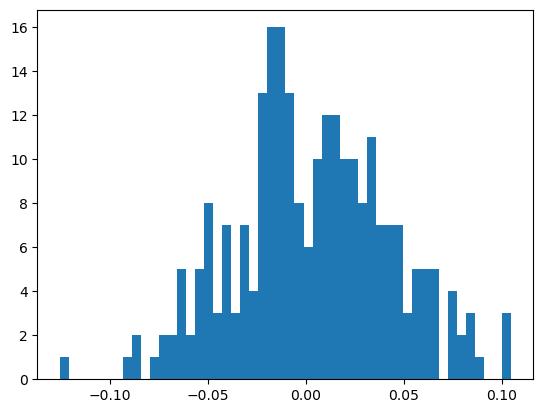

In [11]:
# histogram of daily returns
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(yret, 50) # set # of bins for histogram
plt.show()

In [12]:
# statistics on daily returns
print("mean=", round(yret.mean(),5))
print("std dev=", round(yret.std(),5))
# skewness and kurtosis can be checked to test if distribution is Normal
print("skewness=", round(yret.skew(),5))
print("kurtosis=", round(yret.kurt(),5))

mean= 0.00368
std dev= 0.03989
skewness= -0.01417
kurtosis= -0.06814


### Nvidia's daily returns do not follow an exact normal distribution per above statistics